# Breast Cancer Classification Using Neural Network

In [1]:
# Classify the patients to diseased or not using NEURAL NETWORK

## 1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

## 2. Data import & preprocessing

#### Data import and first look:

In [3]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [4]:
# Feature names:
print (breast_cancer_dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# Feature's values for the first datapoint:
print (breast_cancer_dataset.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [6]:
# Label value foe rhe first datapoint:
print (breast_cancer_dataset.target[0])

0


In [7]:
# Wich means :
print (breast_cancer_dataset.target_names[0])

malignant


#### Pandas df:

In [8]:
# Convert to pandas df:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [9]:
# Adding labels to our df :
data_frame['label'] = breast_cancer_dataset.target

In [10]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


#### Shape, distribution and info:

In [12]:
# Shape
data_frame.shape

(569, 31)

In [13]:
# Label distribution
# We have 212 benign (0), 357 malignant (1)
data_frame.label.value_counts()

1    357
0    212
Name: label, dtype: int64

In [14]:
# This says that :
# We have 212 malignant (0), 357 benign (1)
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
# Info :
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Statistical values:

In [16]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 3. Train and Test set + Standarization

#### Split features and labels:

In [17]:
X = data_frame.drop(columns = 'label', axis=1)
Y = data_frame['label']

In [18]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [21]:
print (X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


#### Standarization:

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [34]:
print (X_train_std[0])

[-0.01330339  1.7757658  -0.01491962 -0.14478895  0.22879041  0.17546662
 -0.54440164 -0.1282563  -1.01205427 -0.15270564 -0.11809273  0.51565734
  0.03524556 -0.2057197   0.09043522  0.08775907 -0.39162479  0.79264996
  0.03869712  0.64948729 -0.18639977  1.18721279 -0.19614077 -0.2913543
 -0.33218215 -0.17136714 -0.65932952 -0.13236958 -1.08014517 -0.03527943]


## 4. Building Neural Network 

#### NN layer:

In [22]:
# Input layers > Hidden Layers > Output Layers

#### Import libraries:

In [23]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

#### Build layers:

In [24]:
# 1. Input : 
# Each neuron represents one feature = 30, the first layer (flatten) will convert the X_train
# to a single dimensional array.

# 2. Hidden : 
# Let's say we want 20 neurons 

# 3. Output : 
# We want to have 2 layers (0,1) that represents the labels of this model

In [25]:
model = keras.Sequential([
    # Input:
    keras.layers.Flatten(input_shape = (30,)),
    # Hidden:
    keras.layers.Dense(20, activation = 'relu'),
    # Output:
    keras.layers.Dense(2, activation = 'sigmoid')
])

#### Compiling the NN - set parameters:

In [26]:
# Optimizer : the parameter that bring better performance from the network, ther are several types
# loss function : a measure for the model to know how much optimization it needs

In [27]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## 5. Training the model

In [35]:
# Validation spit: the model will use 10% of the data to test itself
# epochs : How many times the model will go through the data

history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 10)

# val_loss: validation loss, val_accuracy : validation accuracy
# We can see that the loss function is decreasing, accuracy increasing

Epoch 1/10
13/13 [==============================] - 0s 13ms/step - loss: 0.7242 - accuracy: 0.5183 - val_loss: 0.6171 - val_accuracy: 0.6522
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5341 - accuracy: 0.7653 - val_loss: 0.4540 - val_accuracy: 0.8478
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.8631 - val_loss: 0.3696 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 0.8973 - val_loss: 0.3111 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2958 - accuracy: 0.9144 - val_loss: 0.2654 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2558 - accuracy: 0.9340 - val_loss: 0.2307 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 0.9364 - val_loss: 0.2049 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

## 6. Test the model

#### Visualizing accuracy:

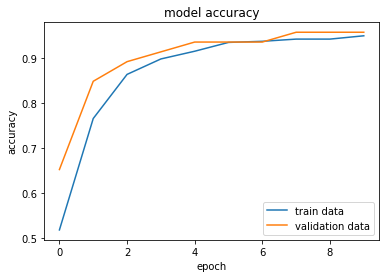

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train data', 'validation data'], loc = 'lower right')

#### Visualizing Loss:

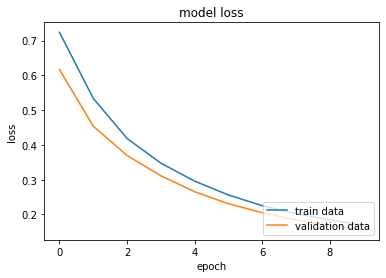

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train data', 'validation data'], loc = 'lower right')

#### Accuracy on test data:

In [38]:
# Run the model on test data:
loss, accuracy = model.evaluate(X_test_std, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9561


## 7. Check the output of the model

#### X_test shape and example:

In [42]:
# This is the shape of test data
print (X_test_std.shape)

(114, 30)


In [46]:
# And this is how first row looks like:
print (X_test_std[0])

[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


#### Make predictions on the X_test:

In [39]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 2ms/step


In [40]:
print(Y_pred.shape)

(114, 2)


In [44]:
# [probability it's 0, probability it's 1]
# If the first values is maximum the model returns 0, if the second is maximum it returns 1
print (Y_pred[0])

[0.387699   0.36233622]


#### Convert the result to 0,1 not probabilities:

In [52]:
# We want the model to return 0,1 not proabilities:
# argmax() returns the index of the max values
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels[0:10])

[0, 1, 1, 0, 1, 0, 1, 1, 1, 1]


## 8. Building predictive system

In [53]:
def predict_fun(input_data): 
    
    # Change input data to np array:
    input_data_as_numpy_array = np.asarray(input_data)
    
    # Reshape the numpy array to predict 1 data point:
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    
    # Standarize the data:
    input_data_std = scaler.transform(input_data_reshaped)
    
    # Make prediction :
    prediction = model.predict(input_data_std)
    
    # Prediction label:
    prediction_label = [np.argmax(prediction)]
    
    if (prediction_label[0] == 0):
        return 'Malignant'
    else : 
        return 'Benign'